# Pymaceuticals Inc.
---

### Analysis

1- Capomulin and Ramicane Are Effective: The box plots show that mice treated with Capomulin and Ramicane had lower tumor volumes compared to the other drugs. This suggests that these two treatments were more effective at reducing tumor size.

2- Mouse Weight and Tumor Volume Correlation: There is a positive correlation between mouse weight and average tumor volume for mice treated with Capomulin. This means that heavier mice tended to have slightly larger tumors.

3- Outlier in Infubinol Treatment: The Infubinol treatment had an outlier, meaning that one of the mice had a tumor volume that was quite different from the others. This could indicate that this treatment doesn't work consistently well for all mice. 

In [124]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [125]:
# Checking the number of mice.
unique_mice_count = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice: {unique_mice_count}")

Number of unique mice: 249


In [126]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_ids = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
print(duplicate_mice_ids['Mouse ID'].unique())


['g989']


In [127]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_ids["Mouse ID"].unique())]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [128]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mice_ids["Mouse ID"].unique())]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [129]:
# Checking the number of mice in the clean DataFrame.
updated_mice_count = cleaned_data["Mouse ID"].nunique()
print(f"\nNumber of unique mice after cleaning: {updated_mice_count}")


Number of unique mice after cleaning: 248


## Summary Statistics

In [130]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean_Tumor_Volume="mean", 
    Median_Tumor_Volume="median", 
    Tumor_Volume_Variance="var", 
    Tumor_Volume_Std_Dev="std", 
    Tumor_Volume_Std_Err="sem"
)
summary_stats

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [131]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
print("\nTumor Volume (mm3)")
summary_stats


Tumor Volume (mm3)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

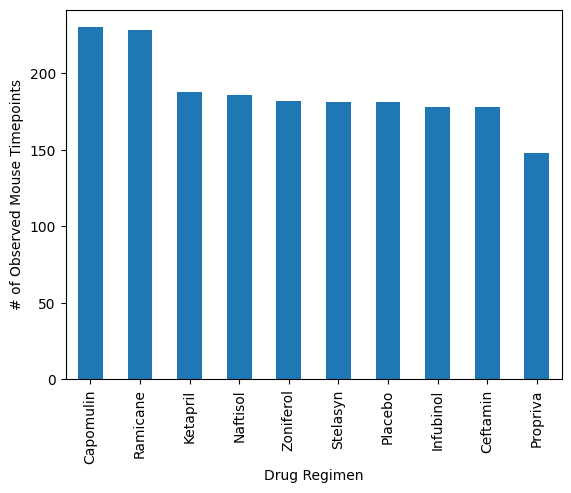

In [132]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = cleaned_data["Drug Regimen"].value_counts()
drug_regimen_count.plot(kind="bar", ylabel="# of Observed Mouse Timepoints", xlabel="Drug Regimen")
plt.show()

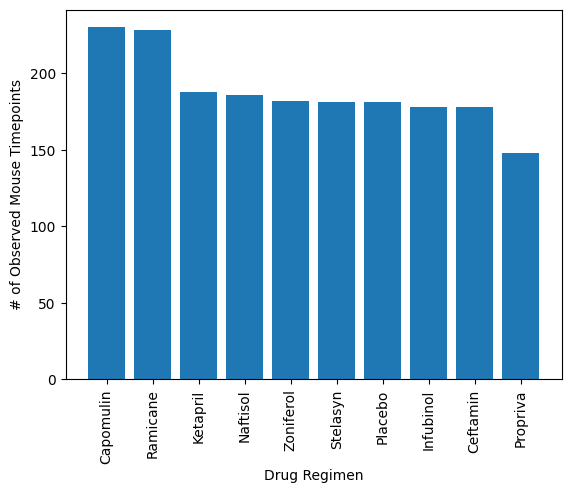

In [133]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_count.index, drug_regimen_count.values)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

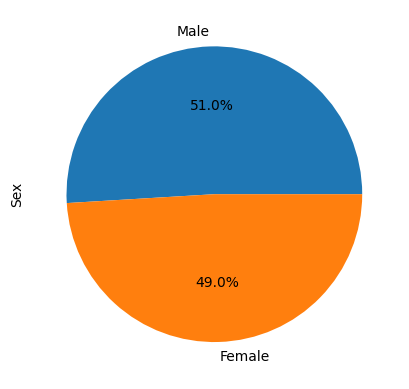

In [134]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = cleaned_data["Sex"].value_counts()
sex_counts.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

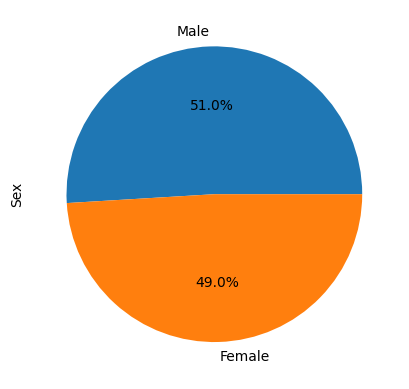

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_counts, labels=sex_counts.index, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [136]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, cleaned_data, on=["Mouse ID", "Timepoint"])

In [137]:
# Put treatments into a list for for loop (and later for plot labels)
promising_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
for drug in promising_treatments:
    drug_data = final_tumor_volume[final_tumor_volume["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_volumes.append(drug_data)
    quartiles = drug_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    print(f"\n{drug} potential outliers:")
    print(outliers)



Capomulin potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol potential outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\Owner\AppData\Local\Temp\ipykernel_11876\2301780493.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volumes, labels=promising_treatments, flierprops={'markerfacecolor': 'r', 'marker': 'o'})


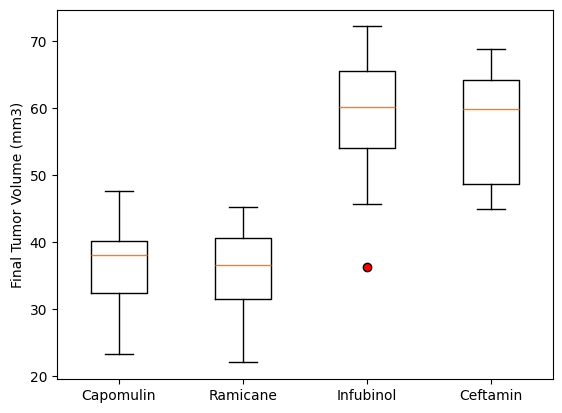

In [138]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volumes, labels=promising_treatments, flierprops={'markerfacecolor': 'r', 'marker': 'o'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

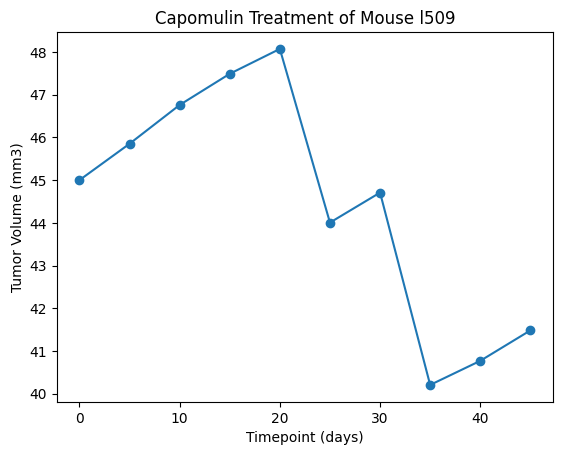

In [139]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_mice = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
single_mouse_data = capomulin_mice[capomulin_mice["Mouse ID"] == "l509"]
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker='o')
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

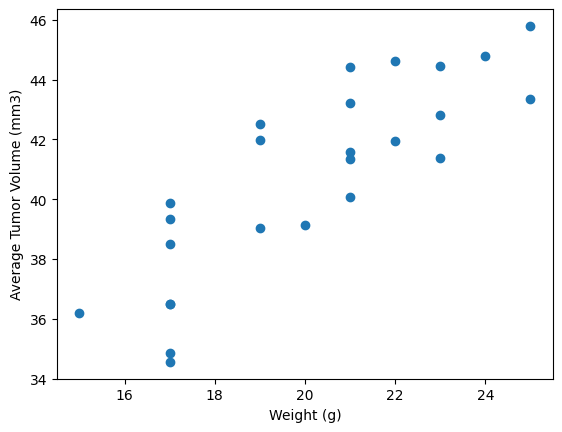

In [140]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_mice.groupby("Mouse ID").mean(numeric_only=True)
avg_tumor_volume = avg_tumor_volume.dropna(subset=["Weight (g)", "Tumor Volume (mm3)"])
plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression


The correlation between mouse weight and the average tumor volume is 0.84


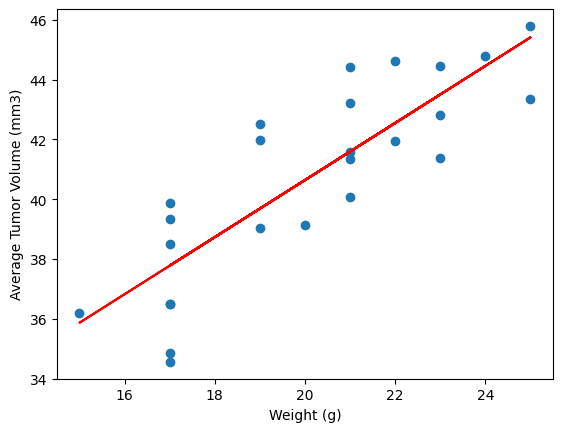

In [141]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = np.corrcoef(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"])[0, 1]
print(f"\nThe correlation between mouse weight and the average tumor volume is {correlation:.2f}")

slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"])
regression_values = avg_tumor_volume["Weight (g)"] * slope + intercept
plt.scatter(avg_tumor_volume["Weight (g)"], avg_tumor_volume["Tumor Volume (mm3)"])
plt.plot(avg_tumor_volume["Weight (g)"], regression_values, color='r')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()